## Please jumpt to Read data ------ Start point for reopen the file for quick start of the project.

In [86]:
# Import Data
import pandas as pd
import numpy as np
from pandas_datareader import data, wb

### Data cleaning & Write to CSV

In [128]:
# Concat All Compaines

def build_stock_df(company_tickers):
    columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Company_name', 'Company_ticker', 'Field', 'Dis_dep']
    ldfs = []
    for (ticker, company_name, field, dis_dep) in zip(company_tickers, company_names, fields, dis_deps):
        file_name = ticker + ' Historical Prices.csv'
        company_frame = pd.read_csv(file_name, index_col = False, skiprows= [0], parse_dates= ['Date'])
        company_frame['Company_ticker'] = ticker
        company_frame['Company_name']= company_name
        company_frame['Field'] = field
        company_frame['Dis_category'] = dis_dep
        ldfs.append(company_frame)
    return(pd.concat(ldfs, ignore_index=True))

company_tickers = ['FOXA', 'AMZN', 'AMCX', 'AAL', 'T', 'BOALF', 'BT', 'CBS', 'FUN', 'CCO', 'KO', 'CMCSA', 'DISCA', \
                   'EA', 'FL', 'GLOB', 'GOOGL', 'HSY', 'IMAX', 'K', 'MCD', 'MSFT', 'NFLX', 'NKE', 'NOK', 'PM', 'PHG', 'PTSXQ', 'SEAS', 'SBGI',\
                   'SIX', 'SNE', 'SBUX', 'TGT', 'TWX', 'TSN', 'VZ', 'VIAB', 'NVDA', 'INTC', 'AMD', 'DIS']
company_names = ['21st Century Fox', 'Amazon', 'AMC Networks Inc ', 'America Airline', 'AT&T', 'Boral Ltd', 'BT Group', 'CBS ', 'Cedar Fair Entertainment Company', \
                 'Clear Channel Outdoor Holdings Inc', 'Coca-Cola', 'Comcast', 'Discovery Communications Inc ', 'Electronic Arts Inc', \
                 'Footlocker', 'Globant', 'Google', 'Hershey ', 'Imax Corp ', 'Kelloggs', "McDonald's", 'Microsoft', 'Netflix', 'Nike', \
                 'Nokia', 'Philip Morris', 'Philips_NV_ADR', 'Point.360', 'SeaWorld Parks & Entertainment', 'Sinclair Broadcast Group Inc', \
                 'Six Flags Entertainment Corporation', 'Sony', 'Starbucks', 'Target', 'Time Warner', 'Tyson Foods', 'Verizon ', 'Viacom', \
                 'Nvidia', 'Intel', 'AMD', 'Disney']
fields = ['Studio', 'Consumer Product', 'Studio', 'Transportation', 'Telecom Services', 'Construction', 'Telecom Services', 'Media'\
          , 'Parks', 'Media', 'Consumer Product', 'Studio', 'Media', 'Gaming', 'Consumer Product', 'Information Technology Service',\
          'Internet Content & Information', 'Consumer Product', 'Media ', 'Consumer Product', 'Resort', 'Software - Infrastructure',\
          'Media', 'Consumer Product', 'Communication Equipment', 'Consumer Product', 'Consumer Product', 'Media', 'Parks', 'Media',\
          'Parks', 'Studio', 'Consumer Product', 'Consumer Product', 'Studio', 'Consumer Product', 'Media', 'Studio', 'Gaming',\
          'Gaming', 'Gaming', 'Disney']
dis_deps = ['Studio Entertainment', 'Consumer Products & Interactive Media', 'Studio Entertainment', 'Parks and Resorts',\
           'Media Networks', 'Parks and Resorts', 'Media Networks', 'Media Networks', 'Parks and Resorts', 'Media Networks',\
           'Consumer Products & Interactive Media', 'Studio Entertainment', 'Media Networks', \
           'Consumer Products & Interactive Media', 'Consumer Products & Interactive Media', 'Media Networks', 'Media Networks',\
           'Consumer Products & Interactive Media', 'Media Networks', 'Consumer Products & Interactive Media',\
           'Parks and Resorts', 'Media Networks', 'Media Networks', 'Consumer Products & Interactive Media',\
           'Consumer Products & Interactive Media', 'Consumer Products & Interactive Media', \
           'Consumer Products & Interactive Media', 'Media Networks', 'Parks and Resorts', 'Media Networks',\
           'Parks and Resorts', 'Studio Entertainment', 'Consumer Products & Interactive Media',\
           'Consumer Products & Interactive Media', 'Studio Entertainment', 'Consumer Products & Interactive Media',\
           'Media Networks', 'Studio Entertainment', 'Consumer Products & Interactive Media',\
           'Consumer Products & Interactive Media', 'Consumer Products & Interactive Media', 'Disney']
company_stock = build_stock_df(company_tickers)
print(company_stock.head())
#print(company_stock.tail())

        Date   Open   High    Low  Close     Volume Company_ticker  \
0 2017-10-24  26.62  26.70  26.21  26.23  5,339,512           FOXA   
1 2017-10-23  27.51  27.57  26.64  26.69  5,644,300           FOXA   
2 2017-10-20  27.55  27.64  27.31  27.50  8,879,892           FOXA   
3 2017-10-19  27.07  27.41  26.96  27.37  5,743,185           FOXA   
4 2017-10-18  26.96  27.39  26.84  27.18  8,363,299           FOXA   

       Company_name   Field          Dis_category  
0  21st Century Fox  Studio  Studio Entertainment  
1  21st Century Fox  Studio  Studio Entertainment  
2  21st Century Fox  Studio  Studio Entertainment  
3  21st Century Fox  Studio  Studio Entertainment  
4  21st Century Fox  Studio  Studio Entertainment  


In [88]:
# Checking data type
# print(type(company_stock.Volume))
# type(company_stock.Volume[0])

In [129]:
# Transfer Volumn to float
company_stock["Volume"] = company_stock.Volume.apply(lambda x: float(x.replace("�", "0").replace(",","").replace('???','0')))

company_stock.head()

,Date,Open,High,Low,Close,Volume,Company_ticker,Company_name,Field,Dis_category
0,2017-10-24,26.62,26.70,26.21,26.23,5339512.0,FOXA,21st Century Fox,Studio,Studio Entertainment
1,2017-10-23,27.51,27.57,26.64,26.69,5644300.0,FOXA,21st Century Fox,Studio,Studio Entertainment
2,2017-10-20,27.55,27.64,27.31,27.50,8879892.0,FOXA,21st Century Fox,Studio,Studio Entertainment
3,2017-10-19,27.07,27.41,26.96,27.37,5743185.0,FOXA,21st Century Fox,Studio,Studio Entertainment
4,2017-10-18,26.96,27.39,26.84,27.18,8363299.0,FOXA,21st Century Fox,Studio,Studio Entertainment


In [90]:
# # Replace white space with _ Fall
# #company_stock.iloc[:, 7:] = [x.strip().replace(' ', '_') for x in company_stock.iloc[:, 7:]]
# company_stock.Company_name = company_stock.Company_name.str.replace('\s+', '_')

# company_stock.iloc[:, 7:].apply(lambda x: x.str.strip()).replace('\s+', '_')
# # df.replace('\s+', '_',regex=True,inplace=True)
# # pd.DataFrame(data = a)
# #pd.DataFrame(data = c)
# company_stock.head()

In [130]:
# Replace space to _

columns = ['Company_name','Field','Dis_category']
for c in columns:
    company_stock[c] = company_stock[c].str.replace('\s+', '_')

In [131]:
# Reveiw columns & Dis_category
company_stock.Company_ticker.unique()
print(list(company_stock))
company_stock.Dis_category.unique()

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Company_ticker', 'Company_name', 'Field', 'Dis_category']


array(['Studio_Entertainment', 'Consumer_Products_&_Interactive_Media',
       'Parks_and_Resorts', 'Media_Networks', 'Disney'], dtype=object)

In [132]:
# Generate return column 
close_px = company_stock['Close']#assign close price 
close_px.shift(-1)
rets = close_px / close_px.shift(-1) - 1 #obtain the daily rate of return
rets.head()
company_stock['Rate_of_Return'] = rets #add rets to df as a column
company_stock.head()

,Date,Open,High,Low,Close,Volume,Company_ticker,Company_name,Field,Dis_category,Rate_of_Return
0,2017-10-24,26.62,26.70,26.21,26.23,5339512.0,FOXA,21st_Century_Fox,Studio,Studio_Entertainment,-0.017235
1,2017-10-23,27.51,27.57,26.64,26.69,5644300.0,FOXA,21st_Century_Fox,Studio,Studio_Entertainment,-0.029455
2,2017-10-20,27.55,27.64,27.31,27.50,8879892.0,FOXA,21st_Century_Fox,Studio,Studio_Entertainment,0.004750
3,2017-10-19,27.07,27.41,26.96,27.37,5743185.0,FOXA,21st_Century_Fox,Studio,Studio_Entertainment,0.006990
4,2017-10-18,26.96,27.39,26.84,27.18,8363299.0,FOXA,21st_Century_Fox,Studio,Studio_Entertainment,0.011161


In [133]:
# Write to CSV
company_stock.to_csv('company_stock.csv', index= False)

In [95]:
# df1 = df.loc[:,['Close','Rate_of_Return','Company_ticker','Dis_category']]
# df1

### Read data ------ Start point for reopen the file

In [134]:
# Import Data
import pandas as pd
import numpy as np
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
company_stock = pd.read_csv('company_stock.csv', index_col = False)
company_stock.head()

,Date,Open,High,Low,Close,Volume,Company_ticker,Company_name,Field,Dis_category,Rate_of_Return
0,2017-10-24,26.62,26.70,26.21,26.23,5339512.0,FOXA,21st_Century_Fox,Studio,Studio_Entertainment,-0.017235
1,2017-10-23,27.51,27.57,26.64,26.69,5644300.0,FOXA,21st_Century_Fox,Studio,Studio_Entertainment,-0.029455
2,2017-10-20,27.55,27.64,27.31,27.50,8879892.0,FOXA,21st_Century_Fox,Studio,Studio_Entertainment,0.004750
3,2017-10-19,27.07,27.41,26.96,27.37,5743185.0,FOXA,21st_Century_Fox,Studio,Studio_Entertainment,0.006990
4,2017-10-18,26.96,27.39,26.84,27.18,8363299.0,FOXA,21st_Century_Fox,Studio,Studio_Entertainment,0.011161


### Amy's Part Starts 
_______________________________________________________________________________________________________________________________

In [136]:
# Slice datas for useage: amy_sub, amy_sub_close, amy_sub_close_media, amy_sub_close_park & resotr


amy_sub = company_stock.query("Dis_category != 'Studio_Entertainment'").query("Dis_category != 'Consumer_Products_&_Interactive_Media'")

# ==== Close price Data set =====
amy_sub_close = amy_sub[['Date', 'Close', 'Company_name', 'Dis_category','Rate_of_Return']]
amy_sub_close_media = amy_sub_close.query('Dis_category == "Media_Networks"|Dis_category == "Disney"')
amy_sub_close_pr = amy_sub_close.query('Dis_category == "Parks_and_Resorts"|Dis_category == "Disney"')


# ==== Rate of return data set ====
amy_sub_ret = amy_sub[['Date', 'Rate_of_Return', 'Company_name', 'Dis_category']]
amy_sub_ret_media = amy_sub_ret.query('Dis_category == "Media_Networks"|Dis_category == "Disney"')
amy_sub_ret_pr = amy_sub_ret.query('Dis_category == "Parks_and_Resorts"|Dis_category == "Disney"')

amy_sub_close_media.tail()
amy_sub_ret_pr.Company_name.unique()

array(['America_Airline', 'Boral_Ltd', 'Cedar_Fair_Entertainment_Company',
       "McDonald's", 'SeaWorld_Parks_&_Entertainment',
       'Six_Flags_Entertainment_Corporation', 'Disney'], dtype=object)

In [137]:
# Select time range and pivot
amy_sub_close_media_p = amy_sub_close_media.pivot(index = 'Date', columns='Company_name', values = 'Close').ix['2010-01-01': '2017-10-24']
amy_sub_close_pr_p = amy_sub_close_pr.pivot(index = 'Date', columns='Company_name', values = 'Close').ix['2010-01-01': '2017-10-24']
amy_sub_ret_media_p = amy_sub_ret_media.pivot(index = 'Date', columns='Company_name', values = 'Rate_of_Return').ix['2010-01-01': '2017-10-24']
amy_sub_ret_pr_p = amy_sub_ret_pr.pivot(index = 'Date', columns='Company_name', values = 'Rate_of_Return').ix['2010-01-01': '2017-10-24']

In [100]:
amy_sub_close_media_p.tail()

Company_name,AT&T,BT_Group,CBS_,Clear_Channel_Outdoor_Holdings_Inc,Discovery_Communications_Inc_,Disney,Globant,Google,Imax_Corp_,Microsoft,Netflix,Point.360,Sinclair_Broadcast_Group_Inc,Verizon_
Date,,,,,,,,,,,,,,
2017-10-18,35.71,18.19,56.96,4.30,19.63,98.25,41.86,1012.74,21.05,77.61,195.54,0.02,30.35,48.65
2017-10-19,35.69,18.22,57.83,4.25,20.09,99.01,40.60,1001.84,20.90,77.91,195.13,0.02,30.20,49.21
2017-10-20,35.54,18.12,58.92,4.17,20.29,99.40,40.71,1005.07,21.30,78.81,194.16,0.02,30.75,49.53
2017-10-23,35.25,18.27,57.95,4.05,19.62,98.70,40.39,985.54,20.95,78.83,192.47,0.02,30.10,48.99
2017-10-24,34.86,18.15,56.94,4.00,19.46,98.29,39.92,988.49,21.20,78.86,196.02,0.02,30.80,48.94


#### Plot by Disney_category

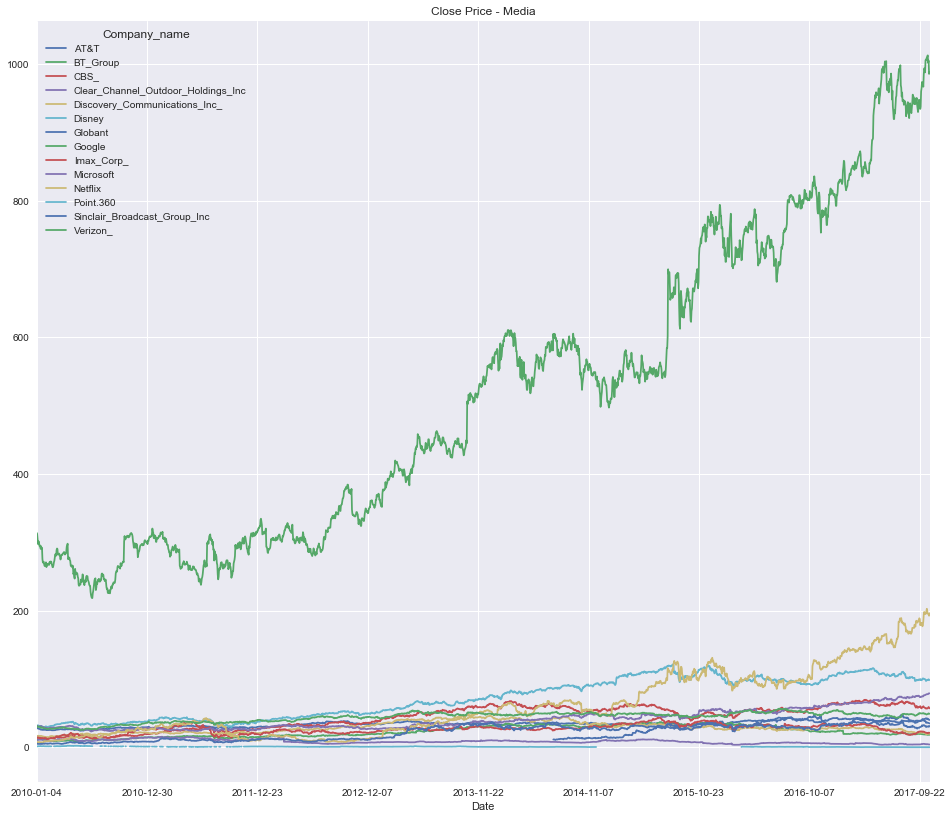

In [101]:
# Close Price _ Media
amy_sub_close_media_p.plot(figsize = (16,14), title='Close Price - Media')
plt.show()

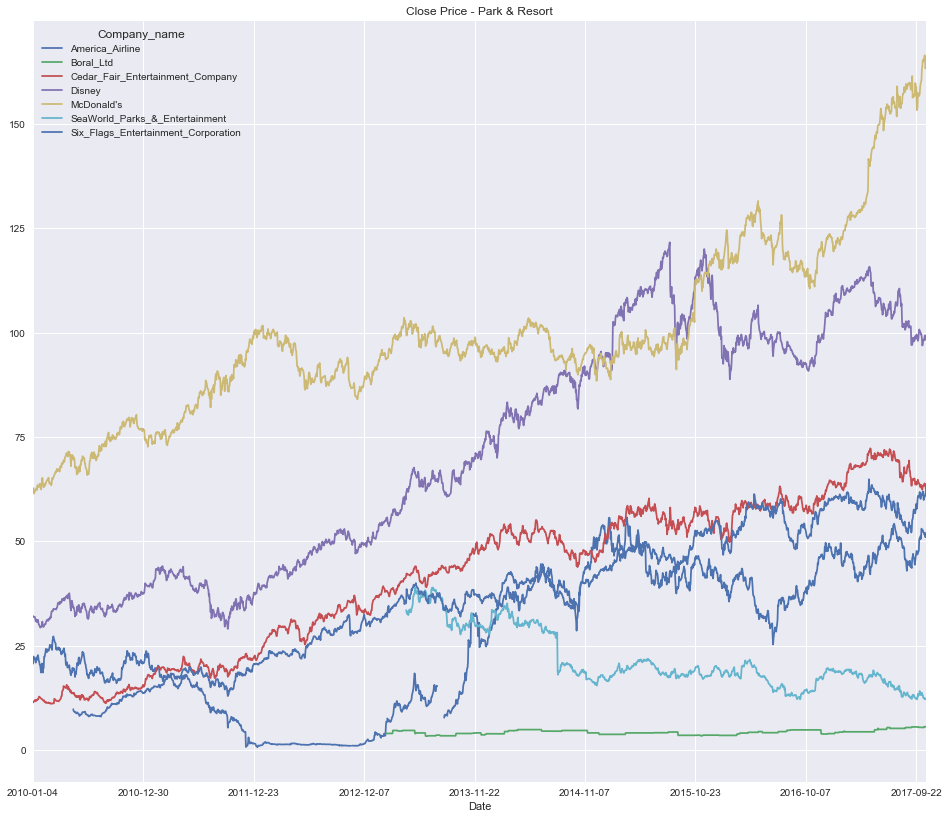

In [138]:
# Close Price _ Park & Resort
amy_sub_close_pr_p.plot(figsize = (16,14), title='Close Price - Park & Resort')
plt.show()

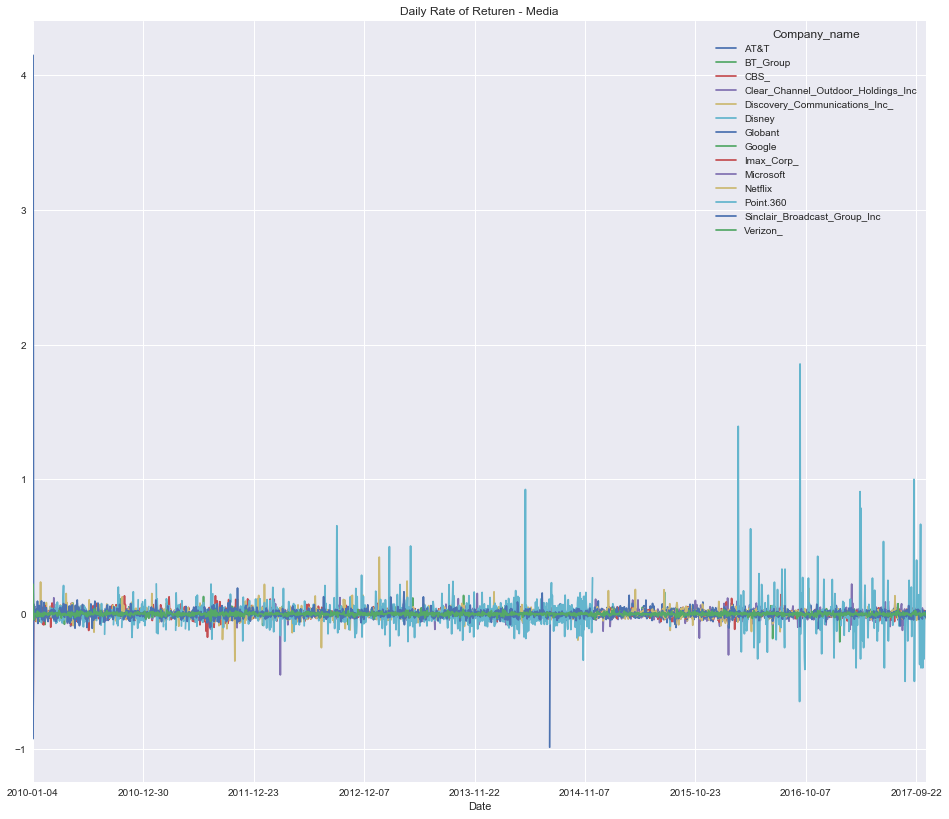

In [103]:
amy_sub_ret_media_p.plot(figsize = (16,14), title='Daily Rate of Returen - Media')
plt.show()

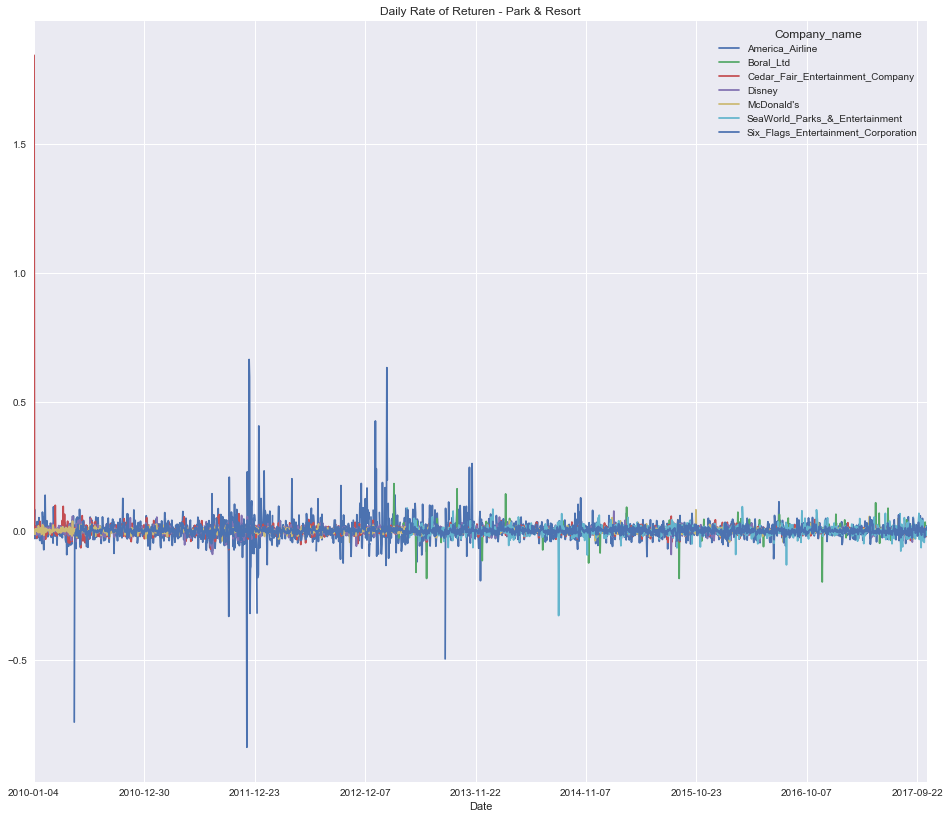

In [139]:
# Daily rate of return - Park & Resort
amy_sub_ret_pr_p.plot(figsize = (16,14), title='Daily Rate of Returen - Park & Resort')
plt.show()

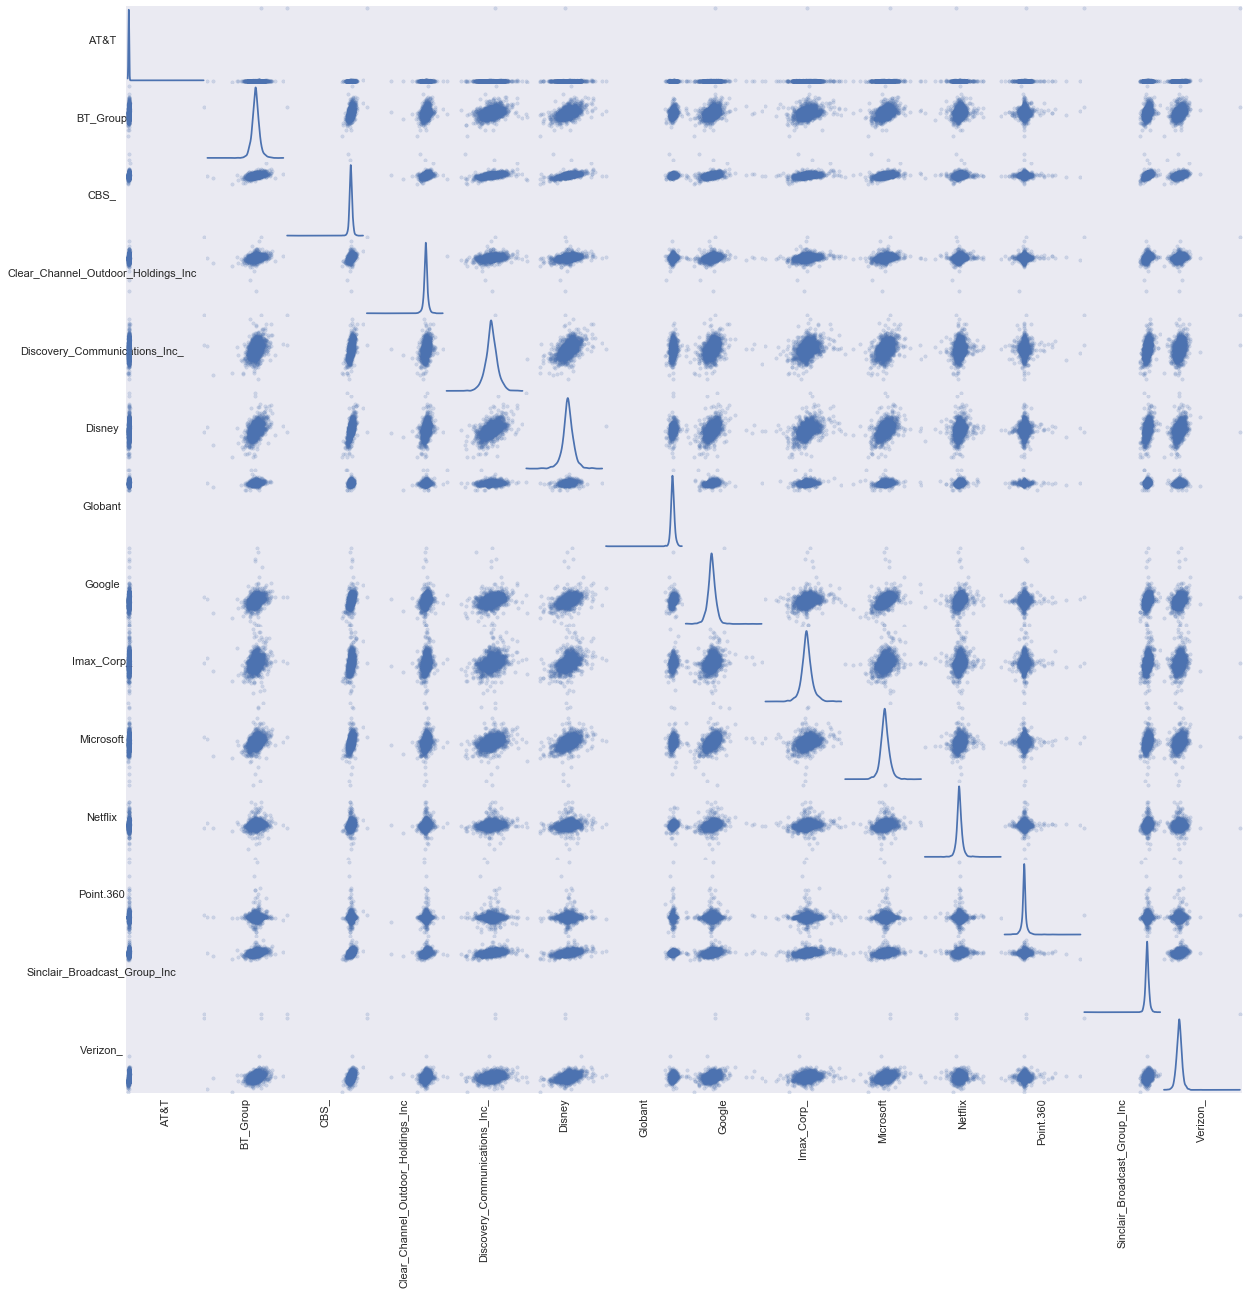

In [117]:
# Media_ Return _Scattor matrix
#from pandas.plotting import scatter_matrix
cols = amy_sub_close_media_p.columns.tolist()
amy_sub_ret_media_p = amy_sub_ret_media_p.dropna(how = 'all')

colMap = {}
sm = pd.scatter_matrix(amy_sub_ret_media_p, diagonal = 'kde', figsize = (20,20), alpha = 0.2)
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]



plt.show()

In [110]:
# Media _ Return rate _ correlationship 
corr_media = amy_sub_ret_media_p.corr()
corr_media.dropna(how = 'any')
corr_media

Company_name,AT&T,BT_Group,CBS_,Clear_Channel_Outdoor_Holdings_Inc,Discovery_Communications_Inc_,Disney,Globant,Google,Imax_Corp_,Microsoft,Netflix,Point.360,Sinclair_Broadcast_Group_Inc,Verizon_
Company_name,,,,,,,,,,,,,,
AT&T,1.000000,0.064413,-0.650541,-0.486426,0.048601,0.036093,0.053928,0.048005,0.025820,0.061654,-0.011657,0.014176,-0.583893,0.497427
BT_Group,0.064413,1.000000,0.294530,0.219934,0.352062,0.443365,0.103581,0.333608,0.271622,0.362874,0.150590,0.032332,0.251331,0.346652
CBS_,-0.650541,0.294530,1.000000,0.563288,0.419189,0.469762,0.130531,0.290070,0.294955,0.298238,0.159397,-0.010624,0.723099,-0.045194
Clear_Channel_Outdoor_Holdings_Inc,-0.486426,0.219934,0.563288,1.000000,0.246559,0.286380,0.078252,0.183584,0.198911,0.200122,0.118567,0.018977,0.506086,-0.073761
Discovery_Communications_Inc_,0.048601,0.352062,0.419189,0.246559,1.000000,0.538437,0.108988,0.312034,0.334956,0.361762,0.171259,-0.001917,0.326224,0.276835
Disney,0.036093,0.443365,0.469762,0.286380,0.538437,1.000000,0.098656,0.417043,0.411334,0.449436,0.195624,0.031242,0.370702,0.363810
Globant,0.053928,0.103581,0.130531,0.078252,0.108988,0.098656,1.000000,0.058006,0.105367,0.102550,0.106916,-0.007058,0.110712,0.020708
Google,0.048005,0.333608,0.290070,0.183584,0.312034,0.417043,0.058006,1.000000,0.281484,0.469302,0.256565,0.035636,0.233057,0.273645
Imax_Corp_,0.025820,0.271622,0.294955,0.198911,0.334956,0.411334,0.105367,0.281484,1.000000,0.286531,0.173568,0.028315,0.277958,0.196568


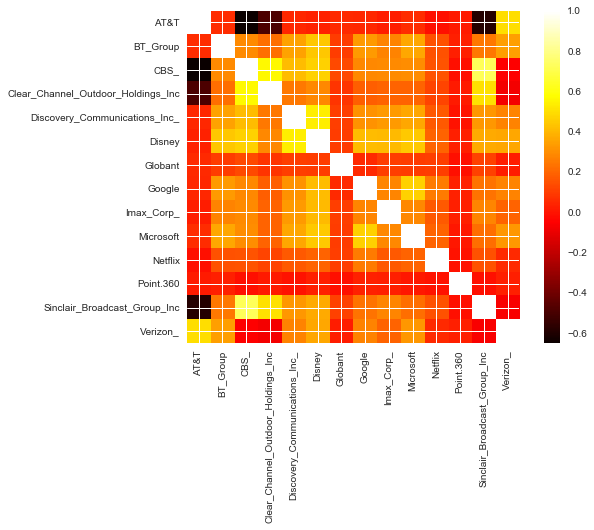

In [115]:
plt.imshow(corr_media, cmap = 'hot', interpolation = 'none')
plt.colorbar()
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.xticks(range(len(corr_media)), corr_media.columns, rotation=90)
plt.yticks(range(len(corr_media)), corr_media.columns)
plt.show()

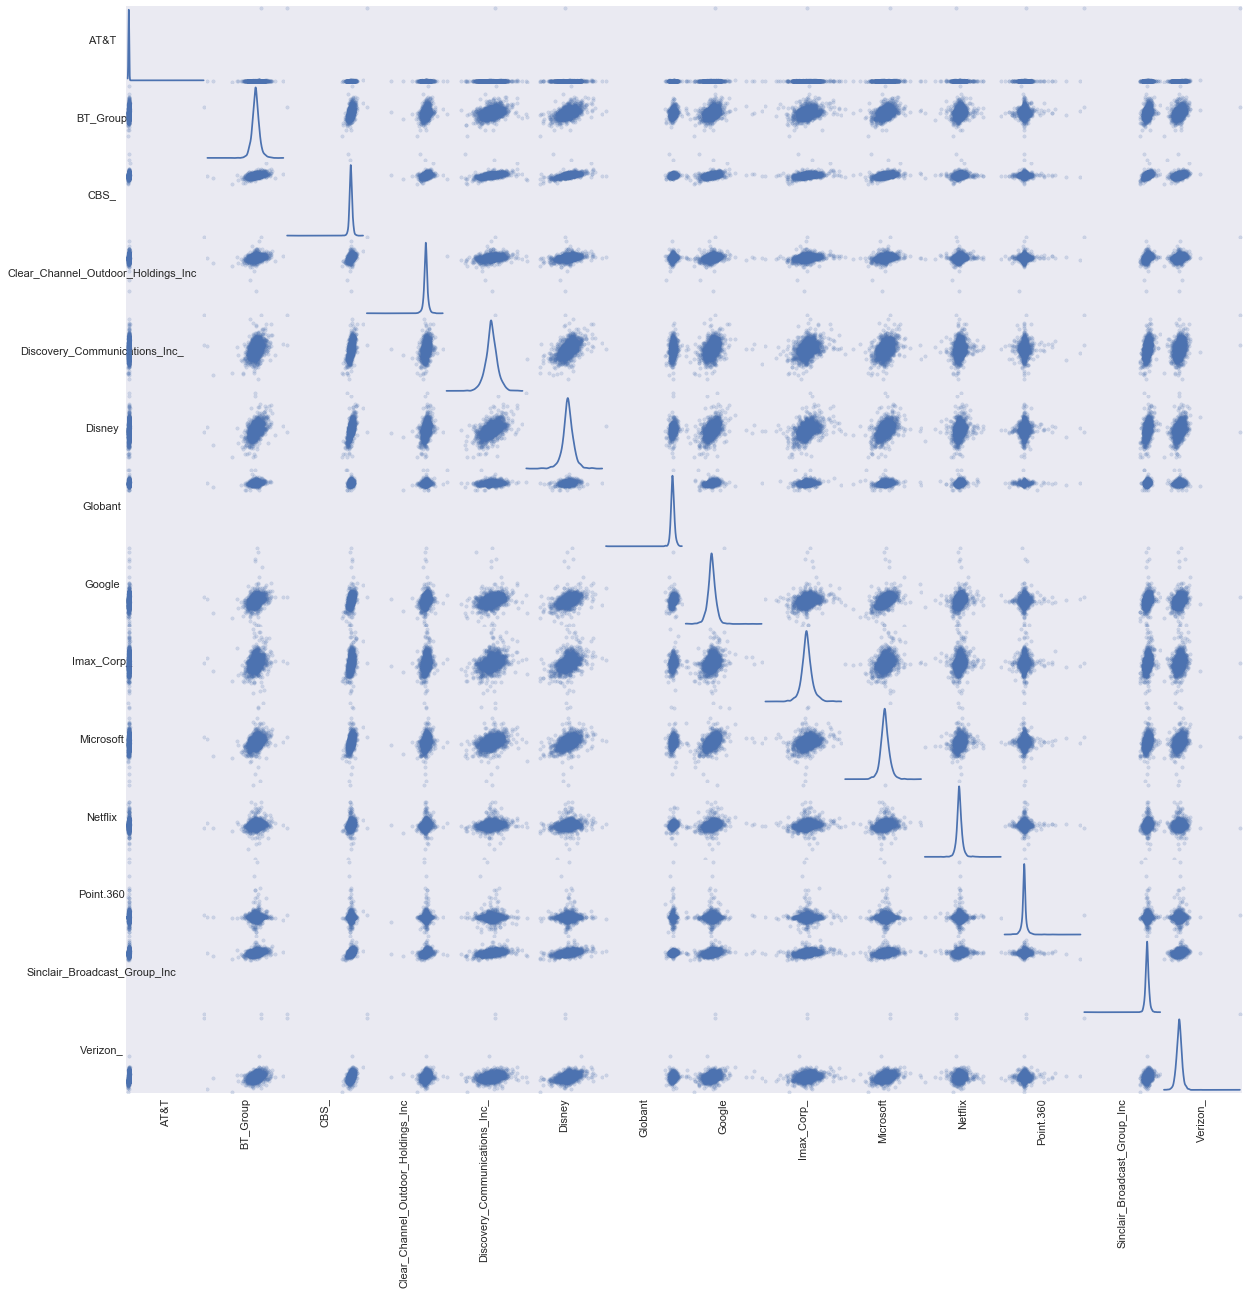

In [140]:
# Park & Resort _ Return rate _ correlationship

# Media_ Return _Scattor matrix
#from pandas.plotting import scatter_matrix
cols = amy_sub_close_media_p.columns.tolist()
amy_sub_ret_pr_p = amy_sub_ret_pr_p.dropna(how = 'all')

colMap = {}
sm = pd.scatter_matrix(amy_sub_ret_media_p, diagonal = 'kde', figsize = (20,20), alpha = 0.2)
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]



plt.show()

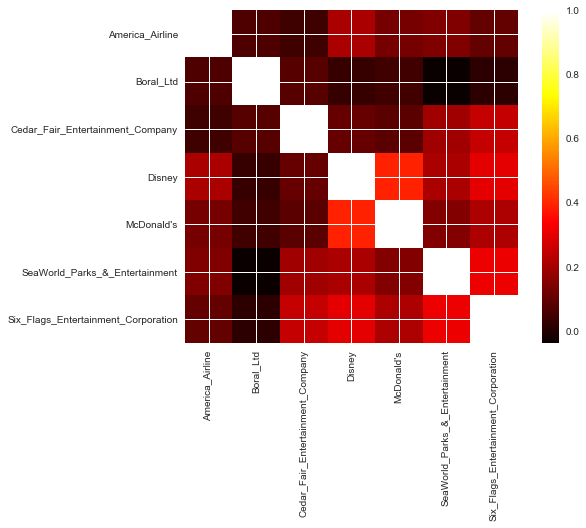

In [141]:
# Park & Resort _ Return _ heat

corr_pr = amy_sub_ret_pr_p.corr()

plt.imshow(corr_pr, cmap = 'hot', interpolation = 'none')
plt.colorbar()
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.xticks(range(len(corr_pr)), corr_pr.columns, rotation=90)
plt.yticks(range(len(corr_pr)), corr_pr.columns)
plt.show()

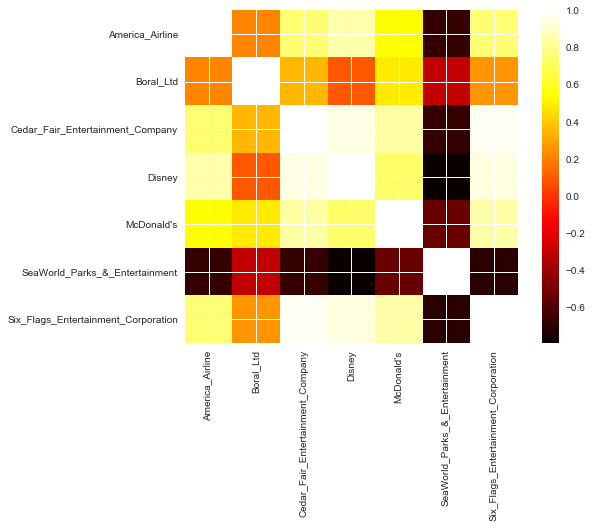

In [143]:
# Try stock price heatmap _ PR

corr_pr_c = amy_sub_close_pr_p.corr()

plt.imshow(corr_pr_c, cmap = 'hot', interpolation = 'none')
plt.colorbar()
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.xticks(range(len(corr_pr_c)), corr_pr_c.columns, rotation=90)
plt.yticks(range(len(corr_pr_c)), corr_pr_c.columns)
plt.show()

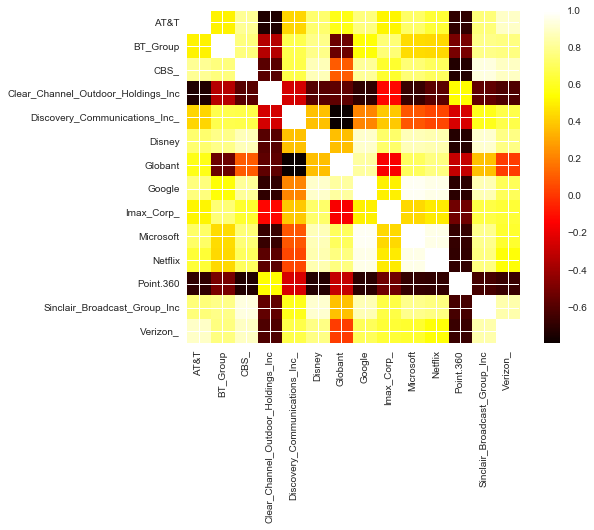

In [144]:
# Try stock price heatmap _ Media
corr_media_c = amy_sub_close_media_p.corr()

plt.imshow(corr_media_c, cmap = 'hot', interpolation = 'none')
plt.colorbar()
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.xticks(range(len(corr_media_c)), corr_media_c.columns, rotation=90)
plt.yticks(range(len(corr_media_c)), corr_media_c.columns)
plt.show()